In [1]:
import numpy as np
from hypergraph import hypergraph
from correlated_stub_matching import correlated_stub_matcher
from measures import sample_intersection
from synthetic import synthetic_hypergraph
from matplotlib import pyplot as plt

In [69]:
# make some fake data

# fake hypergraph

n = 100
d_max = 10
k_max = 10

D, K, edge_list = synthetic_hypergraph(n, d_max, k_max)

# fake timestamps
T = np.random.rand(len(K))
T = np.cumsum(T)

0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


1
10
100


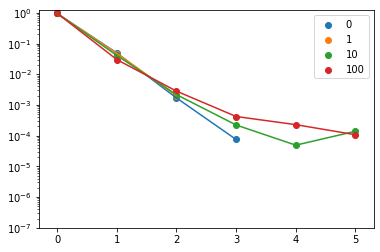

In [70]:
n_samples = 10**(6)

for weight in [0, 1, 10, 100]:
    
    print(weight)

    c = correlated_stub_matcher(D, K, T)
    c.set_weighting_function(
        lambda u, v: (u + weight*v)/(u + weight*v).sum()  # no weights, just "regular-ish" stub-matching + 
    )
    c.stub_matching()
    C = hypergraph(c.get_edge_list())
    
    intersections = sample_intersection(C, n_samples)

    profile = intersections.groupby(['j']).n.sum() / n_samples
    
    plt.plot(profile.index, profile)
    plt.scatter(profile.index, profile, label = weight)
    
plt.semilogy()
plt.gca().set(ylim = (10**(-7), 1.2))
plt.legend()

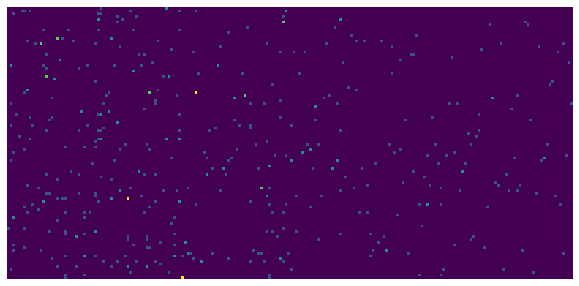

In [71]:
fig = plt.figure(figsize = (20, 5))
plt.imshow(c.M.todense(), interpolation = 'none')
o = plt.gca().axis('off')

In [34]:
C = hypergraph(c.get_edge_list())

[(1e-07, 1.2)]

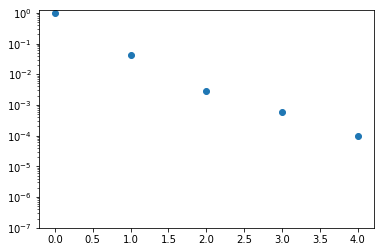

In [35]:
n_samples = 10000

intersections = sample_intersection(C, n_samples)

profile = intersections.groupby(['j']).n.sum() / n_samples
plt.scatter(profile.index, profile)
plt.semilogy()
plt.gca().set(ylim = (10**(-7), 1.2))